In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import descartes
import csv
import pandas as pd

with open('nodos.csv') as f:
    nodos = pd.read_csv(f)
    
barrios = nodos.NOMBRE[nodos.NOMBRE.duplicated()==False].values

vecinos = {}

DEFAULT_COORDINATES  = {}

for barrio in barrios:
    nodos_barrio = nodos[nodos.NOMBRE==barrio]
    coordinates_barrio = zip(nodos_barrio.X.values, nodos_barrio.Y.values)
    poligon = Polygon(coordinates_barrio)
    
    DEFAULT_COORDINATES[barrio] = coordinates_barrio
    
DEFAULT_COLOR = {
  1:  '#8dd3c7',
  2:  '#ffffb3',
  3:  '#bebada',
  4:  '#fb8072',
  5:  '#80b1d3',
  6:  '#fdb462',
  7:  '#b3de69',
  8:  '#fccde5',
  9:  '#d9d9d9',
  10: '#bc80bd',
  11: '#ccebc5',
  12: '#ffed6f',
  13: '#b2df8a',
}

DEFAULT_BARRIOS = nodos.NOMBRE[nodos.NOMBRE.duplicated()==False].values

vecinos = {}

DEFAULT_COORDINATES  = {}

for barrio in DEFAULT_BARRIOS:
    nodos_barrio = nodos[nodos.NOMBRE==barrio]
    coordinates_barrio = zip(nodos_barrio.X.values, nodos_barrio.Y.values)
    poligon = Polygon(coordinates_barrio)
    
    DEFAULT_COORDINATES[barrio] = coordinates_barrio


def fitness(gen):
    """Returns a positive number that indicates how close the individual is to our desired solution.
    """    
    gendf = pd.DataFrame(gen)
    mad = gendf.mad()
    
    return mad.std()

# Ver Fitness.ipynb
def visualize(gen, color=DEFAULT_COLOR, barrios=DEFAULT_BARRIOS, coordinates=DEFAULT_COORDINATES, alpha=0.5):
    """Plots a solution for visual interpretation
    """
    plt.rcParams['figure.figsize'] = (20.0, 10.0)

    fig = plt.figure()
    ax = fig.add_subplot(121)
    
    # vamos de gen a barrio, dia. Como se hace?
    # sacamos el barrio, dia de la matriz de gen.
    gis = zip(barrios, coordinates.values()) 
    
    rows, columns = gen.shape

    for row in range(rows):
        for column in range(columns):
            data = gen[row, column]

            if data > 0:
                poly = coordinates[sorted(barrios)[row]]     
                ax.add_patch(descartes.PolygonPatch(Polygon(poly), fc=color[column+1], alpha=alpha))
    
    ax.axis('equal')
    
    ax2 = fig.add_subplot(122)
    gendf = pd.DataFrame(gen)
    gendf.mad().plot.bar()

    plt.show()
    
# Ver MatrizVecinos.ipynb
matriz_vecinos = pd.read_csv('adyacencia.csv', sep=';')


# Ver Genetic.ipynb
from pyevolve import G2DList
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import Crossovers
from pyevolve import Mutators


def evaluation_function(chromosome):
    # We want to give higher score to those solutions that have small mad.
    #chromosome_np = np.asarray([row for row in chromosome])
    #chromosome_pd = pd.DataFrame(chromosome_np)
    #mad = chromosome_pd.mad()
    #error = mad.std()
    
    # We want to give higher score to those solutions
    # that have barrios that are closer to each other
    # Meaning that each barrio should have at least one neighbor in the same day:
    #for dia in chromosome_np.T:
    #    # Iterate over barrios on that day. But first find non null items.
    #    for item in row:
    #        # check that this barrio has a neighbor
    #        #matriz_vecinos[item :]
    #        pass
    score = 329
    for [row for row in chromosome]:
        if sum(row) != 1:
            score = score - 1

    return 


def ga(dias=13, barrios=329, generations=100, freq_stats=10, evaluation=evaluation_function):
    # Genome instance
    genome = G2DList.G2DList(barrios, dias)
    genome.setParams(rangemin=0, rangemax=1)

    # The evaluator function (objective function)
    genome.evaluator.set(evaluation)
    genome.crossover.set(Crossovers.G2DListCrossoverSingleHPoint)
    genome.mutator.set(Mutators.G2DListMutatorIntegerRange)

    # Genetic Algorithm Instance
    ga = GSimpleGA.GSimpleGA(genome)
    ga.setGenerations(generations)

    # Do the evolution, with stats dump
    # frequency of 10 generations
    ga.evolve(freq_stats=freq_stats)
    return ga.bestIndividual()

def ga_to_array(solution):
    return np.asarray([row for row in solution], dtype=np.uint16)

SyntaxError: invalid syntax (<ipython-input-29-d40d8e266e6b>, line 124)

In [30]:
# Cargar matriz de vecinos.

In [31]:
with open('lectura.csv') as f:
    lectura = pd.read_csv(f)
    
clientes = dict(zip(lectura.GIS, lectura.Clientes))
dias = dict(zip(lectura.GIS, lectura.Dia))

initial_solution = np.zeros((len(lectura.GIS), len(lectura.Dia.unique()+1)))


for index, barrio in enumerate(sorted(lectura.GIS)):
    initial_solution[index, dias[barrio]-1] = clientes[barrio]

## Antes de empezar a generar soluciones mejores que la inicial, grafiquemos el MAD y la ubicación espacial de esa solución

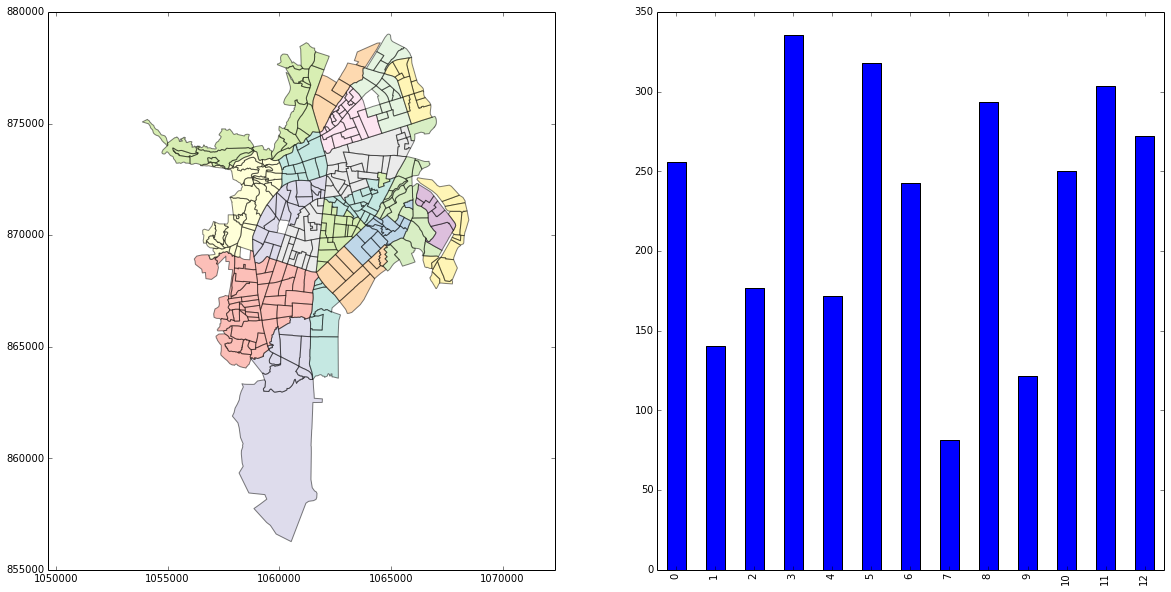

In [32]:
visualize(initial_solution)

In [33]:
%time our_solution_ga = ga(generations=100, freq_stats=10)

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [798.06(1875.25)/617.12(228.96)/665.05(665.05)]
Gen. 10 (10.00%): Max/Min/Avg Fitness(Raw) [16873.59(61706.86)/13435.41(3457.09)/14061.32(14061.32)]
Gen. 20 (20.00%): Max/Min/Avg Fitness(Raw) [15455.94(61706.86)/12442.55(4589.17)/12879.95(12879.95)]
Gen. 30 (30.00%): Max/Min/Avg Fitness(Raw) [14424.28(61706.86)/11665.90(4696.92)/12020.23(12020.23)]
Gen. 40 (40.00%): Max/Min/Avg Fitness(Raw) [15862.48(61706.86)/12723.71(4139.63)/13218.73(13218.73)]
Gen. 50 (50.00%): Max/Min/Avg Fitness(Raw) [17706.50(61706.86)/14203.63(5976.61)/14755.41(14755.41)]
Gen. 60 (60.00%): Max/Min/Avg Fitness(Raw) [16591.96(61706.86)/13304.35(4783.62)/13826.63(13826.63)]
Gen. 70 (70.00%): Max/Min/Avg Fitness(Raw) [16330.62(61706.86)/13049.04(3716.11)/13608.85(13608.85)]
Gen. 80 (80.00%): Max/Min/Avg Fitness(Raw) [16571.74(61706.86)/13266.24(4383.84)/13809.78(13809.78)]
Gen. 90 (90.00%): Max/Min/Avg Fitness(Raw) [18101.61(72058.09)/14518.11(4385.32)/15084.67(15084.67)]
Ge

In [34]:
our_solution_ga

- GenomeBase
	Score:			 72058.092817
	Fitness:		 18395.893730

	Params:		 {'rangemax': 1, 'rangemin': 0}

	Slot [Evaluator] (Count: 1)
		Name: evaluation_function - Weight: 0.50
	Slot [Initializator] (Count: 1)
		Name: G2DListInitializatorInteger - Weight: 0.50
		Doc:  Integer initialization function of G2DList

   This initializator accepts the *rangemin* and *rangemax* genome parameters.
   
   
	Slot [Mutator] (Count: 1)
		Name: G2DListMutatorIntegerRange - Weight: 0.50
		Doc:  Simple integer range mutator for G2DList

   Accepts the *rangemin* and *rangemax* genome parameters, both optional.

   
	Slot [Crossover] (Count: 1)
		Name: G2DListCrossoverSingleHPoint - Weight: 0.50
		Doc:  The crossover of G2DList, Single Horizontal Point 

- G2DList
	List size:	 (329, 13)
	List:
			[0] [0] [0] [1] [0] [0] [0] [1] [0] [0] [0] [1] [0] 
			[1] [1] [0] [0] [0] [0] [1] [0] [0] [0] [1] [1] [1] 
			[0] [1] [0] [1] [1] [1] [1] [1] [0] [0] [0] [0] [1] 
			[1] [1] [0] [1] [0] [1] [0] [0] [1] [0] 

In [35]:
our_solution = ga_to_array(our_solution_ga)

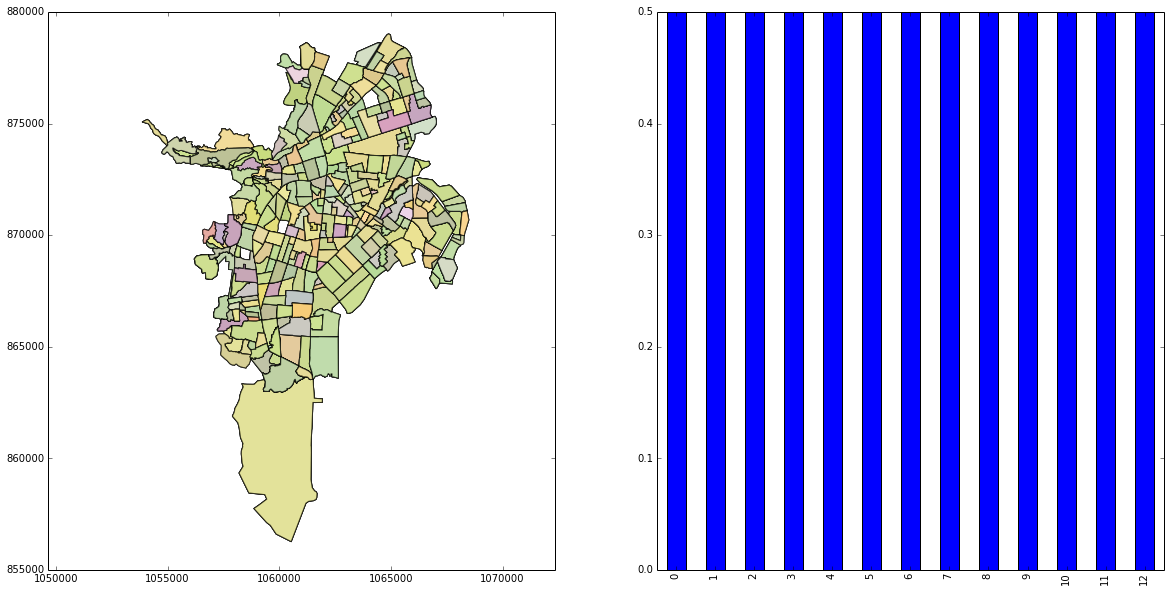

In [36]:
visualize(our_solution)

 ## First, we create a 'bag' of barrios, similar to picking names from a bag.
 ## Then we take the average of the expected clients per barrio and save it in a variable
 ## Then, we pick the first 13 and put them in different buckets, if one of them is neighbor with the others, we will put it back in the bag. They will seed the process.
 ## Then, we start going one by one, as if they were choosing team mates before a match. For each of the barrios in the 13 buckets, we will look at the neighbour list from the last added barrio and one by one try to get items from the bag. If the sum of all clients in a bucket comes close to 10% (more or less) we stop and switch to the next item.